In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [32]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [33]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [34]:
# One-hot encode
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [36]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# ------------------- FINAL ANN MODEL (Used for Evaluation) -------------------
model = MLPClassifier(
    hidden_layer_sizes=(),    # Single layer (no hidden layers)
    activation='logistic',
    solver='adam',
    max_iter=2000,
    random_state=42
)

model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(), max_iter=2000,
              random_state=42)

In [38]:
# Prediction & Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")


Final Test Accuracy: 83.33%


In [39]:
# ------------------- MODEL FOR ACCURACY PER EPOCH PLOT -------------------
train_acc = []
val_acc = []

model_iter = MLPClassifier(
    hidden_layer_sizes=(),
    activation='logistic',
    solver='adam',
    max_iter=1,          # Train 1 iteration at a time
    warm_start=True,     # Keep updating weights
    random_state=42
)
for epoch in range(50):   # Number of epochs
    model_iter.fit(X_train, y_train)
    train_acc.append(model_iter.score(X_train, y_train))
    val_acc.append(model_iter.score(X_test, y_test))

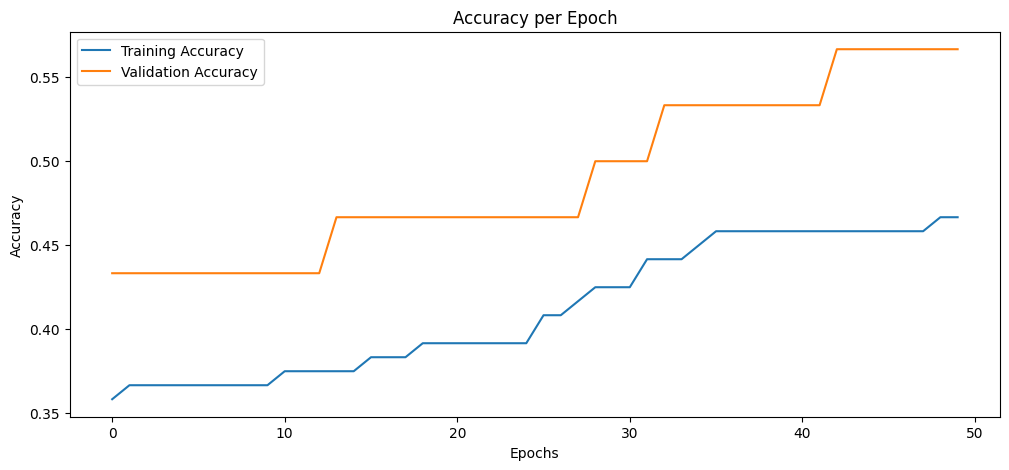

In [40]:
# ------------------- PLOT ACCURACY -------------------
plt.figure(figsize=(12,5))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

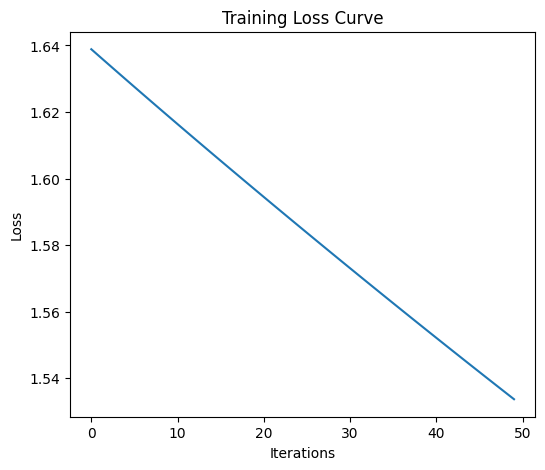

In [41]:
# ------------------- PLOT LOSS CURVE -------------------
plt.figure(figsize=(6,5))
plt.plot(model_iter.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()